# Rastrigin_GA_Inspyred_benchmark

Use of the Genetic Algorithm implemented in Inspyred to solve the Rastrigin manually implemented (because the banchmark one do not provide the expected result)

In [1]:
from random import Random
from time import time
from math import cos
from math import pi
from inspyred import ec
from inspyred.ec import terminators

In [2]:
def plot_best_fitness(population, num_generations, num_evaluations, args):    
    """   
    .. Arguments:
       population -- the population of Individuals
       num_generations -- the number of elapsed generations
       num_evaluations -- the number of candidate solution evaluations
       args -- a dictionary of keyword arguments
    
    """
    import matplotlib.pyplot as plt
    import numpy
    
    stats = ec.analysis.fitness_statistics(population)
    best_fitness = stats['best']
    
    data = []
    if num_generations == 0:
        plt.ion()
        data = [[num_evaluations], [best_fitness]]
        lines = []
        for i in range(1):
            line, = plt.plot(data[0], data[i+1], color='green', label='best')
            lines.append(line)
        # Add the legend when the first data is added.
        plt.legend(loc='upper right')
        args['plot_data'] = data
        args['plot_lines'] = lines
        plt.xlabel('Evaluations')
        plt.ylabel('Fitness')
    else:
        data = args['plot_data']
        data[0].append(num_evaluations)
        data[1].append(best_fitness)
        lines = args['plot_lines']
        for i, line in enumerate(lines):
            line.set_xdata(numpy.array(data[0]))
            line.set_ydata(numpy.array(data[i+1]))
        args['plot_data'] = data
        args['plot_lines'] = lines
    ymin = min([min(d) for d in data[1:]])
    ymax = max([max(d) for d in data[1:]])
    yrange = ymax - ymin
    plt.xlim((0, num_evaluations))
    plt.ylim((ymin - 0.1*yrange, ymax + 0.1*yrange))
    plt.draw()

In [21]:
dimension = 500
def generate_rastrigin(random, args):
    size = args.get('num_inputs', dimension)
    return [random.uniform(-5.12, 5.12) for i in range(size)]

In [19]:
def evaluate_rastrigin(candidates, args):
    fitness = []
    for cs in candidates:
        fit = 10 * len(cs) + sum([((x - 1)**2 - 10 * cos(2 * pi * (x - 1))) for x in cs])
        fitness.append(abs(fit-330))
    return fitness

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Attempting to set identical bottom == top == 8839.694516023128 results in singular transformations; automatically expanding.


[-0.3425939991316218, 1.1148788418623887, 4.1166373274209365, 0.056127562354971516, 0.741917535861198, -1.781424491481412, 3.3070487510485735, 2.888690504479402, 4.21425102470547, 0.6989106687059152, -4.279625148438537, -3.366211337365097, 1.166880045492026, -4.013054038499818, 3.658374390388702, 1.7163048223892146, 2.669007093522607, 3.7213941636709675, 3.9837448610109165, 2.1114261509621555, -1.071622522488484, 2.405560799788155, 1.8556217583947134, 2.442448132480611, 0.7004210730748524, -4.71742515952963, 1.7509830757581355, -4.034554489183716, -0.37778767264431856, 1.9184214805710136, -1.155009320769568, 0.9338701301270671, -0.32031316012467226, 1.0430051842632917, 3.970365938996868, 2.1228798453211457, 0.6918488041635182, 3.2320562850053376, 0.06328976032471267, 2.0293630876742883, 1.8265615413262504, 1.657766037681328, -0.02265528772361236, 3.4666201798043383, -0.08093945247748913, 5.051052062287842, 2.8890950524745795, -2.8629663244070183, -0.7726435070914883, -4.330460527042105

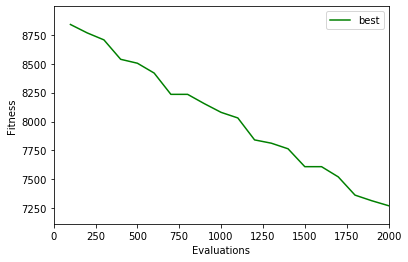

In [22]:


rand = Random()
rand.seed(int(time()))
ga = ec.GA(rand)
ga.observer = plot_best_fitness
ga.terminator = terminators.evaluation_termination
final_pop = ga.evolve(generator=generate_rastrigin,
                      evaluator=evaluate_rastrigin,
                      
                      crossover_rate = 0.9,
                      mutation_rate = 0.02,
                      num_elites=1,
                      num_bits=10,
                      pop_size=100,
                      maximize=False,
                      bounder=ec.Bounder(-5, 5),
                      max_evaluations=2000)

# Sort and print the best individual, who will be at index 0.
final_pop.sort(reverse=True)
print(final_pop[0])

In [15]:
len(final_pop[0].candidate)

50